Exploring the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import functions.functions as aux_fun
importlib.reload(aux_fun)
from datetime import datetime as dti

from sklearn.linear_model import LinearRegression

pd.options.mode.chained_assignment = None 

#### Reading data

In [2]:
# Read data

# Portifolio and profile datasets
portfolio = pd.read_csv('data_treated/portfolio.csv')
profile = pd.read_csv('data_treated/profile_clustered.csv')

# User and offer data, already treated in Data Preparation 
user_offer_df = pd.read_csv('data_treated/user_offer.csv').astype({'offer_id_rec':np.int8})


Quick look at the data

In [3]:
portfolio.head(3)

,reward,channels,difficulty,duration,offer_type,id,offer_id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,2


In [4]:
profile.head(3)

,gender,age,id,became_member_on,income,user_id,rela_member_years,user_cluster
0,NI,55,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,64000.0,0,1.45,0
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,1.03,2
2,NI,55,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,64000.0,2,0.04,0


In [5]:
user_offer_df.head(3)

,offer_id_rec,viewed_rate,completed_rate,tra_offer_infl,valid_view_rate,completed_after_view_rate,reward_won,user_id
0,7,1.0,0.0,49.39,1.0,NaN,0.0,3
1,3,1.0,1.0,19.89,1.0,1.0,5.0,3
2,0,1.0,1.0,21.72,1.0,1.0,10.0,3


#### Data Preparation to Analysis

**Merging datasets**

Merging the user offer dataset with profile and portifolio dataset.   

The extra columns will be used to exploring the data.

In [6]:
# Just interesting columns from profile and portifolio
# Profile
profile2 = profile[['user_id', 'gender', 'age', 'income', 
    'rela_member_years', 'user_cluster']]
# Portifolio
portfolio2 = portfolio[['offer_id', 'offer_type']]

# Merging with user_offer_id
user_offer_df2 = user_offer_df.merge(portfolio2, left_on='offer_id_rec', right_on='offer_id')
user_offer_df2 = user_offer_df2.merge(profile2, on='user_id')

user_offer_df2.head() 

,offer_id_rec,viewed_rate,completed_rate,tra_offer_infl,valid_view_rate,completed_after_view_rate,reward_won,user_id,offer_id,offer_type,gender,age,income,rela_member_years,user_cluster
0,7,1.0,0.0,49.39,1.0,NaN,0.0,3,7,informational,F,75,100000.0,1.21,2
1,3,1.0,1.0,19.89,1.0,1.0,5.0,3,3,bogo,F,75,100000.0,1.21,2
2,0,1.0,1.0,21.72,1.0,1.0,10.0,3,0,bogo,F,75,100000.0,1.21,2
3,8,1.0,1.0,0.00,1.0,0.0,5.0,3,8,bogo,F,75,100000.0,1.21,2
4,7,0.0,0.0,0.00,NaN,NaN,0.0,4,7,informational,NI,55,64000.0,0.98,0


Continuous information such as income and age may be better visualized from their division into parts.  

One good grouping for a single variable is into quartiles, separating the data into 4 equal parts.

In [7]:
# Age quartiles
user_offer_df2['age_quartile'] = pd.qcut(user_offer_df2['age'], q=4)
# user_offer_df2['age_decile'] = pd.qcut(user_offer_df2['age'], q=10)

# Income quartiles
user_offer_df2['income_quartile'] = pd.qcut(user_offer_df2['income'], q=4)
# user_offer_df2['income_decile'] = pd.qcut(user_offer_df2['income'], q=10)

# Time as member quartiles
user_offer_df2['member_years_quartile'] = pd.qcut(user_offer_df2['rela_member_years'], q=4)

user_offer_df2.head()

,offer_id_rec,viewed_rate,completed_rate,tra_offer_infl,valid_view_rate,completed_after_view_rate,reward_won,user_id,offer_id,offer_type,gender,age,income,rela_member_years,user_cluster,age_quartile,income_quartile,member_years_quartile
0,7,1.0,0.0,49.39,1.0,NaN,0.0,3,7,informational,F,75,100000.0,1.21,2,"(64.0, 101.0]","(76000.0, 120000.0]","(0.98, 2.17]"
1,3,1.0,1.0,19.89,1.0,1.0,5.0,3,3,bogo,F,75,100000.0,1.21,2,"(64.0, 101.0]","(76000.0, 120000.0]","(0.98, 2.17]"
2,0,1.0,1.0,21.72,1.0,1.0,10.0,3,0,bogo,F,75,100000.0,1.21,2,"(64.0, 101.0]","(76000.0, 120000.0]","(0.98, 2.17]"
3,8,1.0,1.0,0.00,1.0,0.0,5.0,3,8,bogo,F,75,100000.0,1.21,2,"(64.0, 101.0]","(76000.0, 120000.0]","(0.98, 2.17]"
4,7,0.0,0.0,0.00,NaN,NaN,0.0,4,7,informational,NI,55,64000.0,0.98,0,"(45.0, 55.0]","(51000.0, 64000.0]","(0.57, 0.98]"


**Treating key columns for analysis**

When an offer is received, it is seen or not, accounting by **viewed_rate**  
It can be completed without even seen, accounting by **completed_after_view_rate**

The transaction influenced by an offer depends on: 
1. The transaction is performed after the offer **being visualized**
2. The transaction is performed before **being completed** 
3. The transaction is performed before **preview of the next offer**  

The two main columns for visualization and completion analysis will be the columns **valid_view_rate** and **completed_after_view_rate**

In [8]:
# Treating the valid viewed rate 

# The offer may have been seen, but it was not seen in time of validity of the offer
# The valid visualization column delivers this value

# Just replace the nan by 0, since it was not visualized
user_offer_df2['valid_view_rate'] = user_offer_df2['valid_view_rate'].fillna(0)
user_offer_df2.valid_view_rate.isna().sum()

0

In [9]:
# There are two complete rates. May be after the offer has been seen, which
# it can be involved that the offer influenced the completion or has been completed
# without being seen, which can not be considered influencing in the user

# Replace the nan by 0, since it was not completed after been viewed
user_offer_df2['completed_after_view_rate'] = user_offer_df2['completed_after_view_rate'].fillna(0)
user_offer_df2.completed_after_view_rate.isna().sum()

0

Selecting columns for analysis

In [10]:
user_offer_df3 = user_offer_df2[['offer_id_rec', 'user_id',
    'valid_view_rate', 'completed_after_view_rate','tra_offer_infl', 'offer_type', 
    'gender', 'age', 'income', 'rela_member_years', 'user_cluster', 'age_quartile',
    'income_quartile', 'member_years_quartile']]

user_offer_df3.head(3)

,offer_id_rec,user_id,valid_view_rate,completed_after_view_rate,tra_offer_infl,offer_type,gender,age,income,rela_member_years,user_cluster,age_quartile,income_quartile,member_years_quartile
0,7,3,1.0,0.0,49.39,informational,F,75,100000.0,1.21,2,"(64.0, 101.0]","(76000.0, 120000.0]","(0.98, 2.17]"
1,3,3,1.0,1.0,19.89,bogo,F,75,100000.0,1.21,2,"(64.0, 101.0]","(76000.0, 120000.0]","(0.98, 2.17]"
2,0,3,1.0,1.0,21.72,bogo,F,75,100000.0,1.21,2,"(64.0, 101.0]","(76000.0, 120000.0]","(0.98, 2.17]"


Exporting the dataset to uses in other modules

In [11]:
# Exporting the dataset of user-offer with treatment done
user_offer_df3.to_csv('data_treated/user_offer_expanded.csv', index=False)

---

#### Exploring the data

In this section, some grpahs will be plotted in order to understand how the data is distributed.

**Note**: Many of the cells in this notebook use assistant module functions **functions.py**. The intention is to focus more on visualizations rather than coding. So, any code questions, refer the module **functions.py**

**Distribuiton of offers**

First, look at the distribution of quantity of offers sent to users

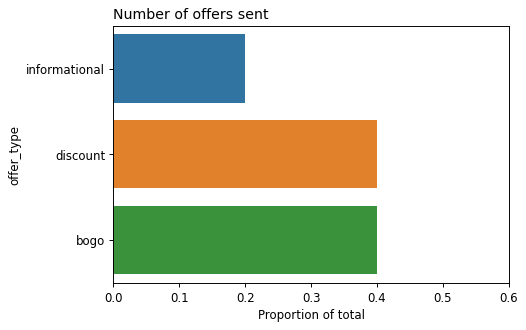

In [12]:
# Plot the proportion of offers sent
aux_fun.plot_by_category_metric(df=user_offer_df3, 
        col_category='offer_type',
        metric='user_id',
        title='Number of offers sent',
        x_label='Proportion of total',
        y_label='offer_type',
        xlims=[0,0.6],
        agg='proportion'
        )

In [13]:
# The number of distributed offers are equivalent to the equivalent of offers
# in portifolio dataset
portfolio.groupby('offer_type').agg({'offer_type':'count'}) / portfolio2.shape[0]

,offer_type
offer_type,
bogo,0.4
discount,0.4
informational,0.2


As well as in profile

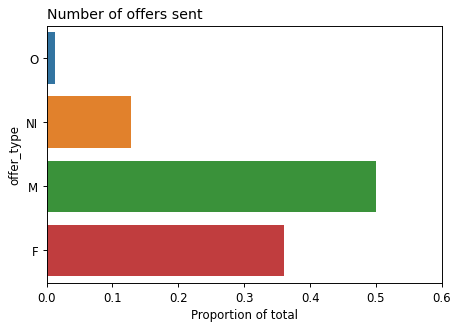

In [14]:
# Plot the proportion of offers sent by gender, just to observe the distribution
# on profile dataset
aux_fun.plot_by_category_metric(df=user_offer_df3, 
        col_category='gender',
        metric='user_id',
        title='Number of offers sent',
        x_label='Proportion of total',
        y_label='offer_type',
        xlims=[0,0.6],
        agg='proportion'
        )

In [15]:
# Looking at proportion on profile Base
(profile2.groupby('gender').agg({'gender':'count'}) / profile2.shape[0]).round(2)

,gender
gender,
F,0.36
M,0.50
NI,0.13
O,0.01


As noted, the distribution of offers follows the distribution of offers in Portifolio and for people present in the profile.  

This demonstrates that the simulation was assembled in order to ensure these proportions, not creating preference for some group

**Metrics for analysis**

The three main metrics at the user-offer table are:
1. Viewed rate
1. Complete rate
1. Average transaction

By the groups available, we can analyze these metrics both by the offers (type and ID), and by the users (age, income, time as a member, cluster)

**Metrics by offers**

Offer Type

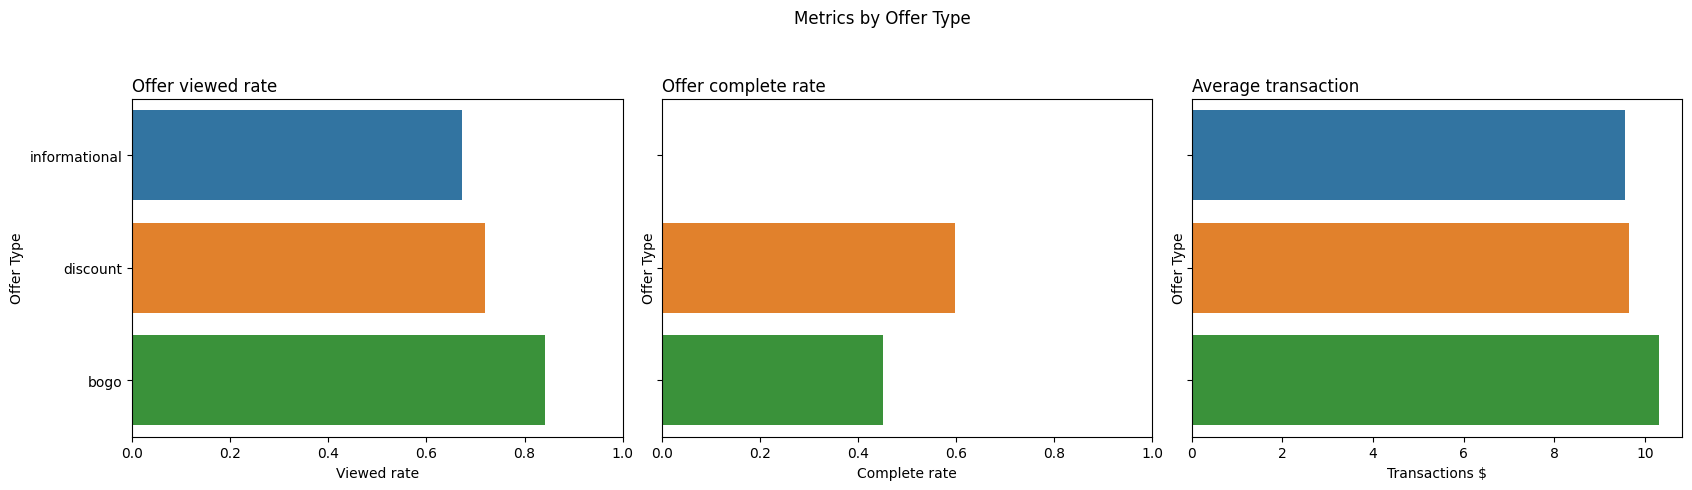

In [16]:
aux_fun.plot_grid_metrics(user_offer_df3, 'offer_type')

By type of offer, it is noted that BOGO offers are more visualized than the others.

Already in complete rate, discount-type offers are higher.

How much transactions, BOGO offers generate higher average.

Offer ID and Offer Type

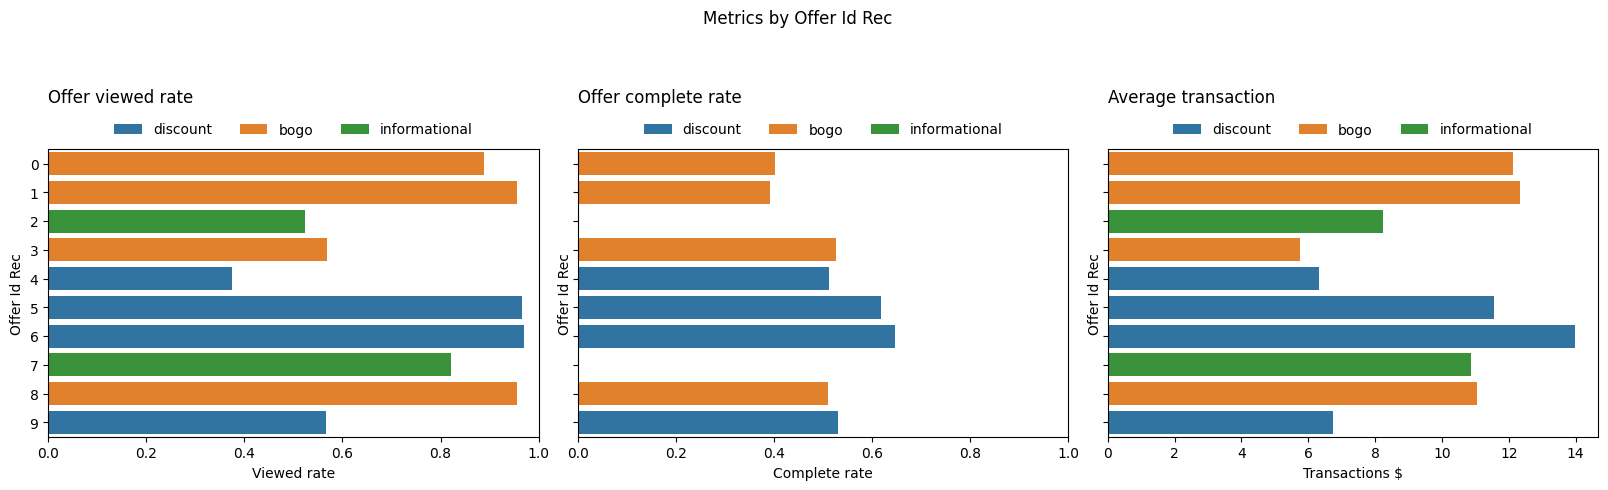

In [17]:
aux_fun.plot_grid_metrics(user_offer_df2, ['offer_id_rec', 'offer_type'])

It is noted that the visualization rate of the offers is distributed according to the number of channels in which they are sent

In [18]:
portfolio[['offer_id', 'channels']]

,offer_id,channels
0,0,"['email', 'mobile', 'social']"
1,1,"['web', 'email', 'mobile', 'social']"
2,2,"['web', 'email', 'mobile']"
3,3,"['web', 'email', 'mobile']"
4,4,"['web', 'email']"
5,5,"['web', 'email', 'mobile', 'social']"
6,6,"['web', 'email', 'mobile', 'social']"
7,7,"['email', 'mobile', 'social']"
8,8,"['web', 'email', 'mobile', 'social']"
9,9,"['web', 'email', 'mobile']"


The offer with ID 4 has only two channels, which justifies its low viewing rate.

Informational offers do not have a complete rate as it is only advertisements of the products.  

While transactions, although BOGO offers own higher average, note that discount offers (6 and 5) is highlighted among others.The general average is decreased precisely by offer 4 and 9, which has few channels

**Metrics by users**

Gender

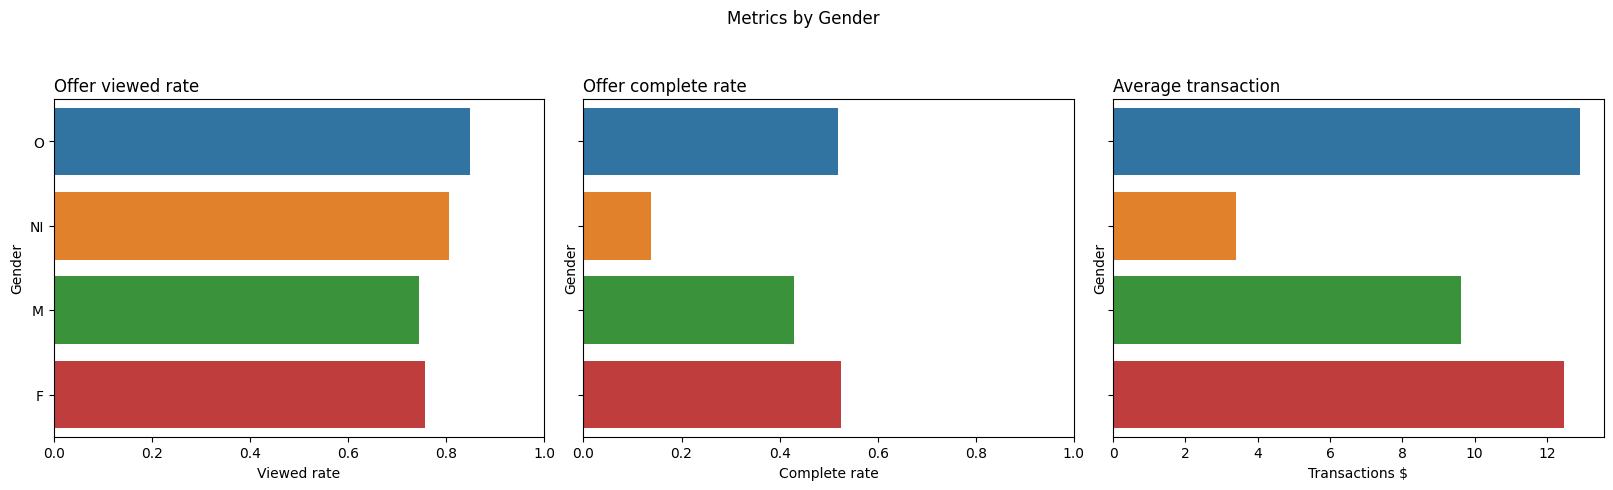

In [19]:
aux_fun.plot_grid_metrics(user_offer_df3, 'gender')

We can see that women have average transactions greater than men and NI. 

Larger avarege transaction for others because the amount of people is lower.

Observing the total transaction done by each gender

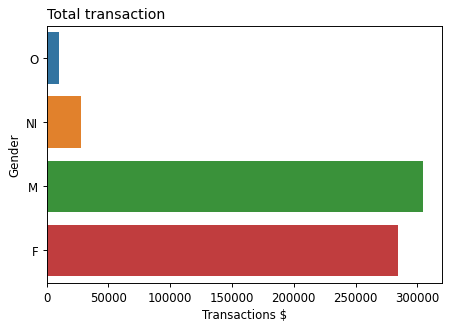

In [20]:
# Ploting total of transactions
aux_fun.plot_by_category_metric(df=user_offer_df3, 
        col_category='gender',
        metric='tra_offer_infl',
        title='Total transaction',
        x_label='Transactions $',
        y_label='Gender',
        agg='sum'
        )

As you can see, men have the largest total amount transacted, followed by women.

Gender and Offer Type

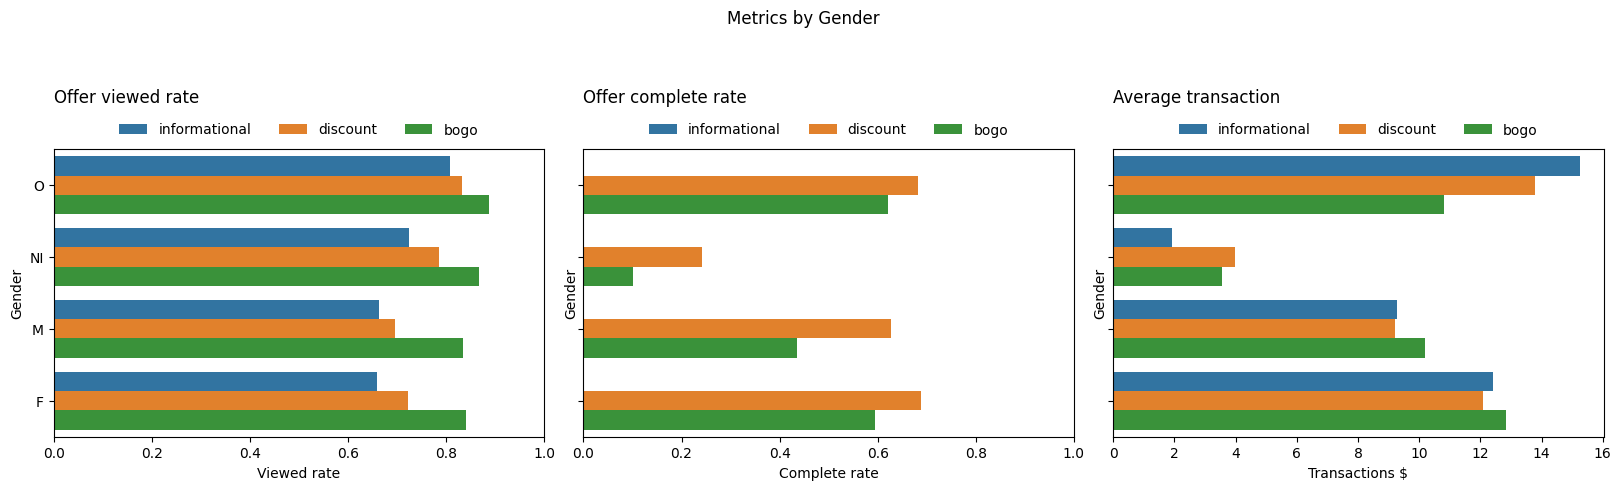

In [21]:
aux_fun.plot_grid_metrics(user_offer_df3, ['gender', 'offer_type'], dodge=True)

Viewing for offer type, it is noted that both women and men have major transactions for BOGO. However, men seem to show greater preference for this type, compared to women, who have more average equality between types.  

Complete rate follows the general trend, has more discount-type offers being completed


Age

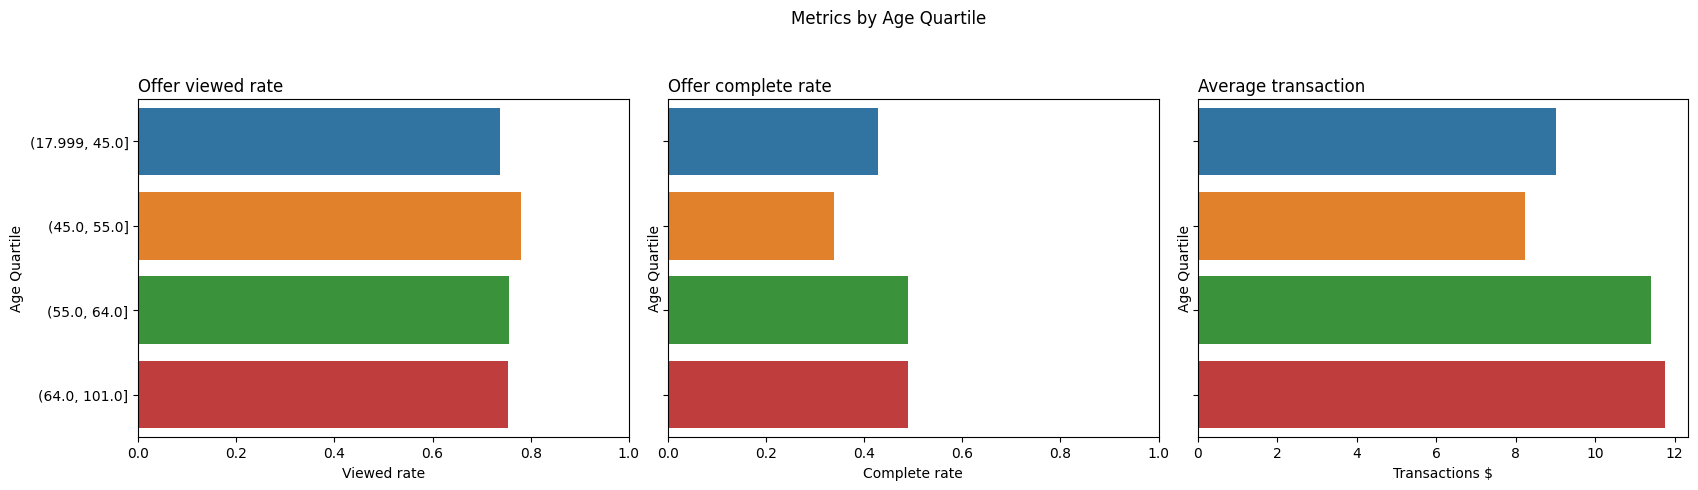

In [22]:
aux_fun.plot_grid_metrics(user_offer_df3, 'age_quartile')

At complete rate, the value is lower for ages between 45 and 55 years.

For transactions, it is noted that the age groups above 55 years have higher averages compared to the low ages.   

Below, we can observe the values by age, without grouping.

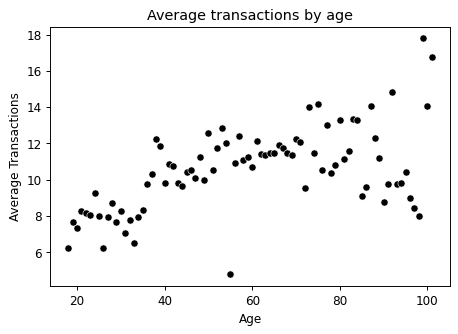

In [29]:
# Plotting transactions by age, continuous variable
plt.figure(dpi=86)
plot_df = user_offer_df3.groupby('age', as_index=False)['tra_offer_infl'].mean()
sns.scatterplot(data=plot_df, x='age', y='tra_offer_infl', color='black')
plt.title('Average transactions by age')
plt.xlabel('Age')
plt.ylabel('Average Transactions')
plt.show()

It is noted that the correlation is positive: the higher the age, the greater the average amount of transactions

Age and Offer Type

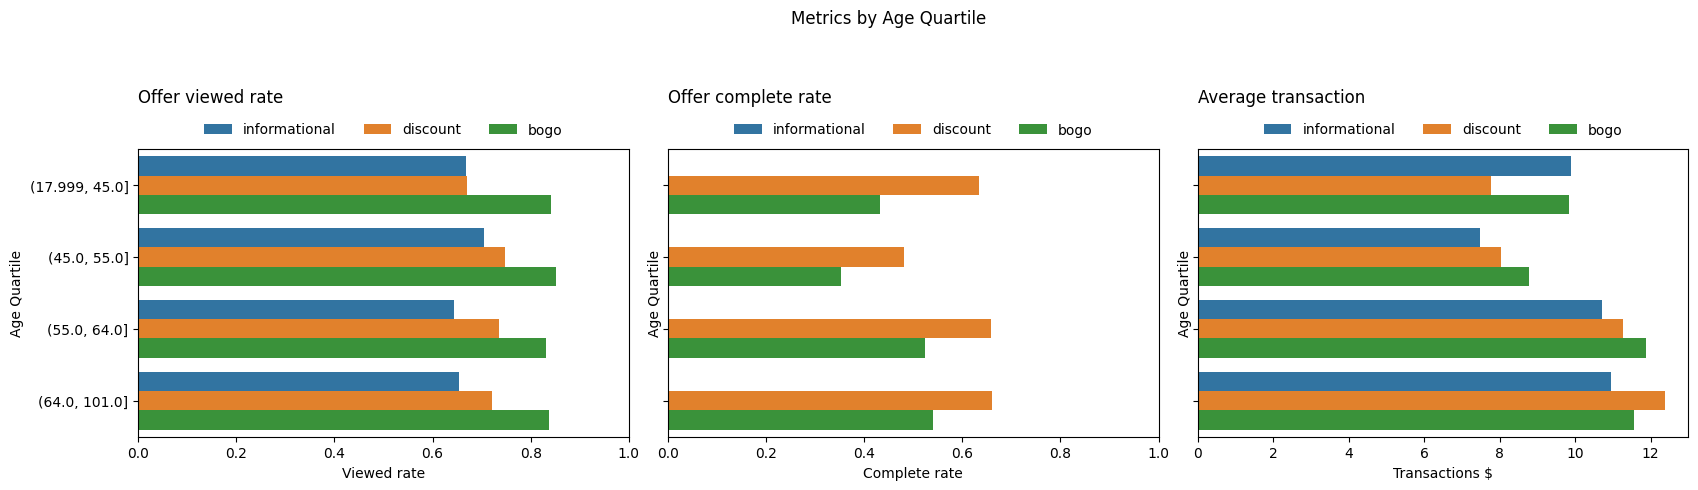

In [30]:
aux_fun.plot_grid_metrics(user_offer_df3, ['age_quartile','offer_type'], dodge=True)

In the transaction chart, it is noted that the most advanced ages (64 to 101) spend more money on average with discount-type offers, while the previous age group (55 to 64) has preferences for BOGO type offers.

The trend of larger transactions in advanced ages can be seen in the center chart below.

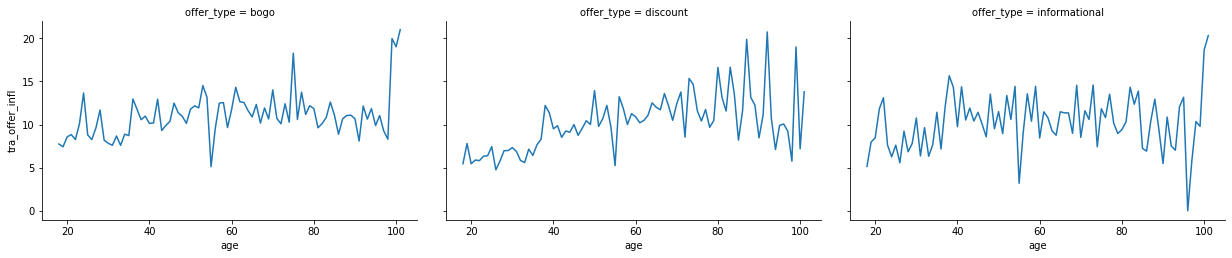

In [40]:
# Summarize dataset to plot
plot_df = user_offer_df3.groupby(['age','offer_type'], as_index=False)['tra_offer_infl'].mean()

g = sns.FacetGrid(data=plot_df, col='offer_type', sharey=True)
g.map_dataframe(sns.lineplot, x='age', y='tra_offer_infl')
plt.gcf().set_size_inches(18,4)

Time as Member

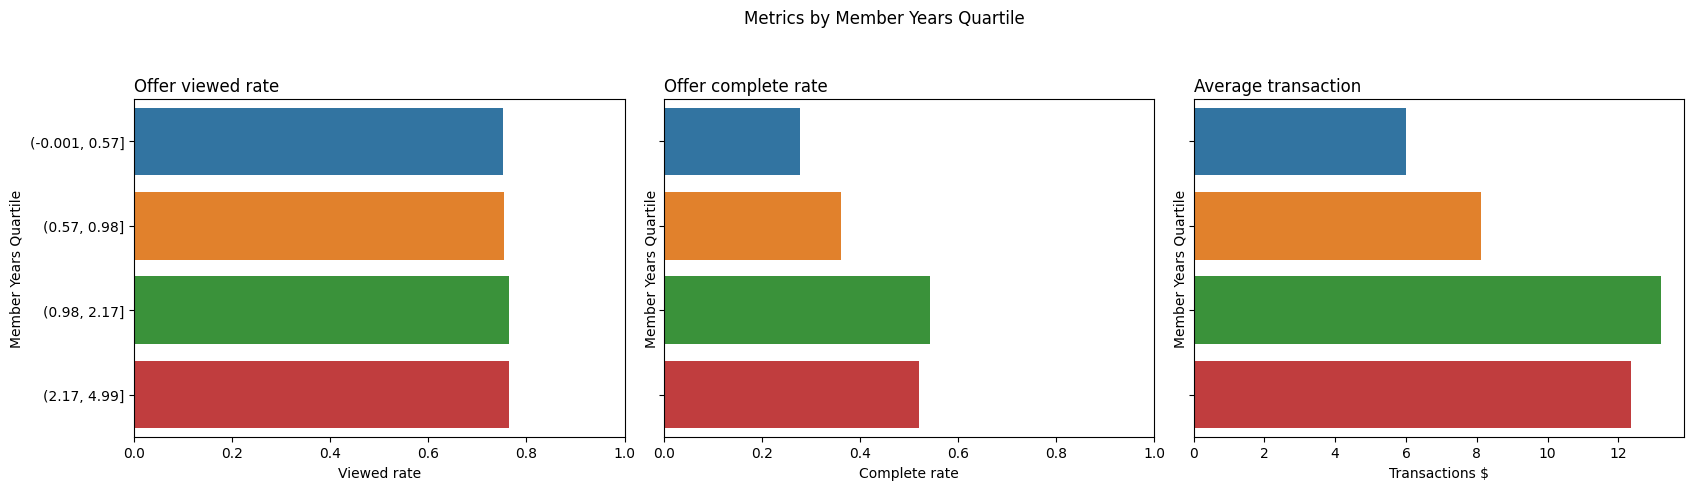

In [41]:
aux_fun.plot_grid_metrics(user_offer_df3, 'member_years_quartile', dodge=True)

It is noted that older members, above 1 year as a member, has higher transaction averages compared to younger members

Time as Member and Offer Type

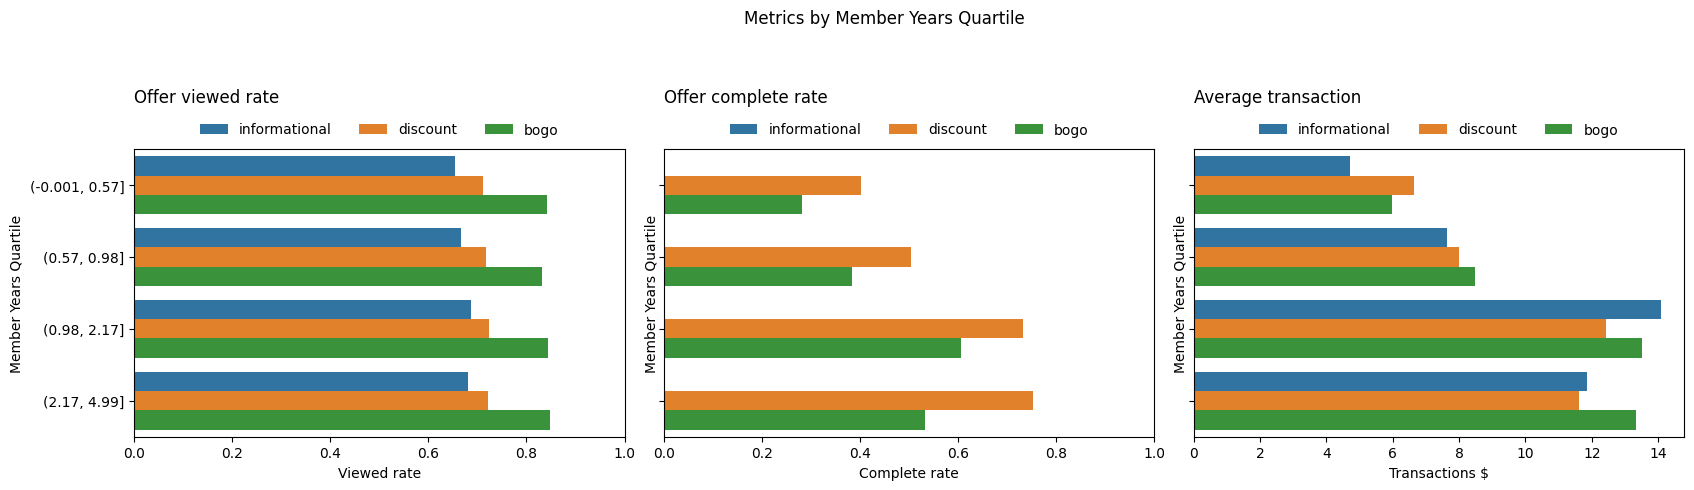

In [42]:
aux_fun.plot_grid_metrics(user_offer_df3, ['member_years_quartile', 'offer_type'], dodge=True)

Looking for offer type, user with 1 to 2 years of membership spend more money with informational type, while user with more than 2 years spend more with BOGO offers

Income

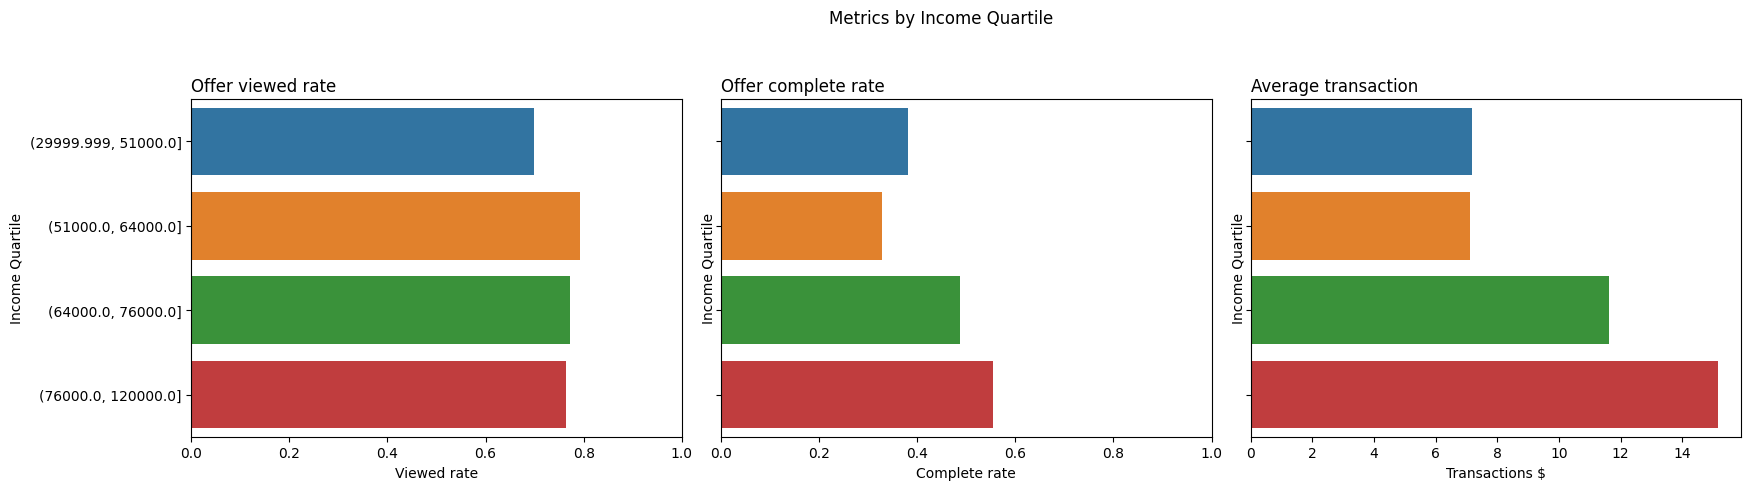

In [43]:
aux_fun.plot_grid_metrics(user_offer_df3, 'income_quartile', dodge=True)

Here the logic happens. User with higher income spend more money on average with offers.

Income and Offer Type

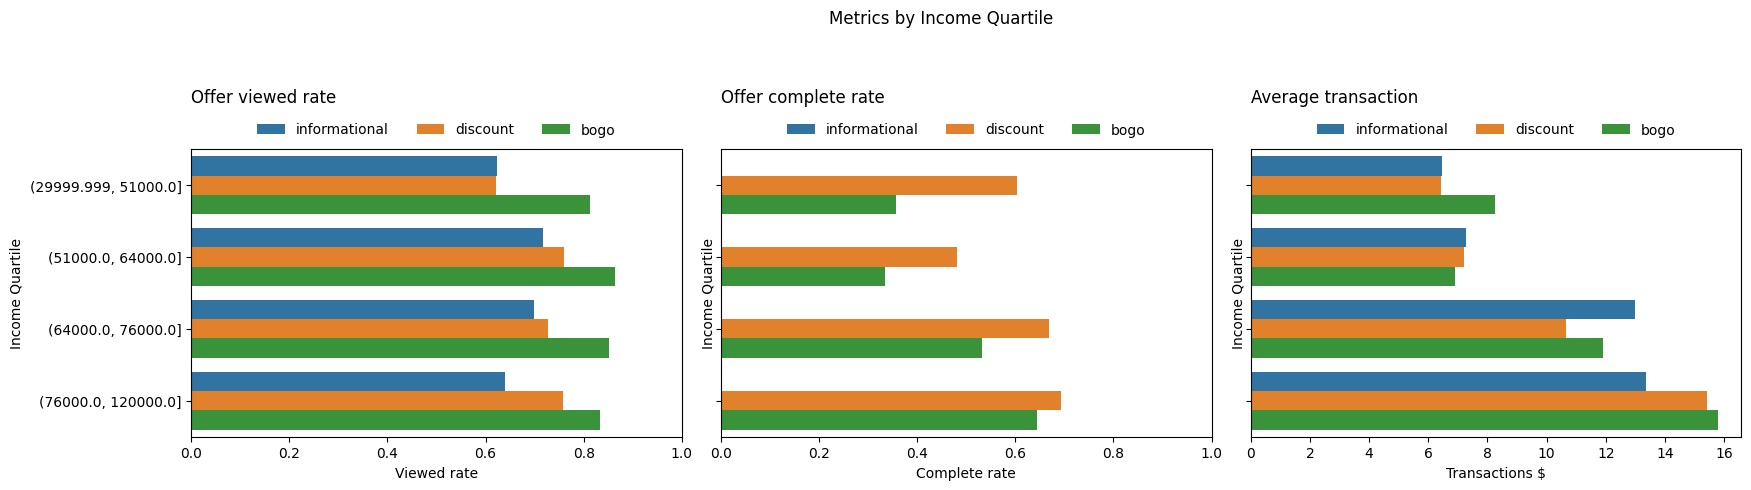

In [44]:
aux_fun.plot_grid_metrics(user_offer_df2, ['income_quartile', 'offer_type'], dodge=True)

For the largest income group, the largest transaction average is for BOGO offers, while for the penultimate group (64k to 76k) has more expenditure on average for informational

User Cluster

To recall, these are the descriptions of the user cluster:

>**0: Middle age, middle income and recent member**  
>**1: Middle age, middle income and antique members**  
>**2: High age, high income and recent member**  
>**3: Low age, low income and recent member**  

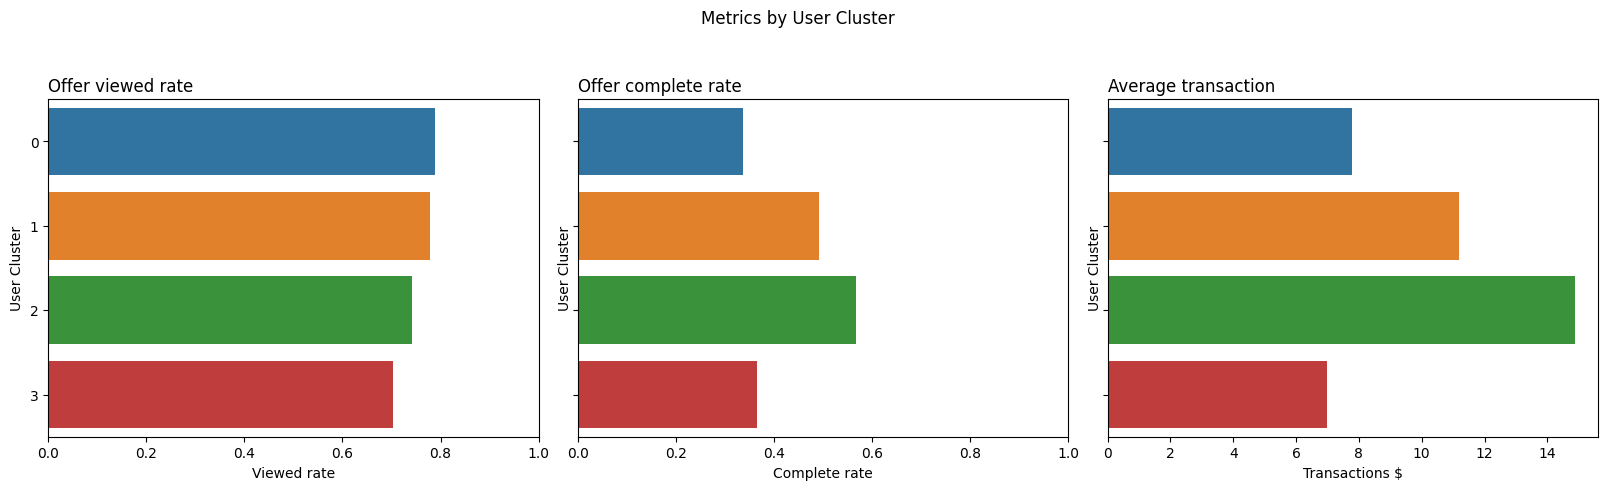

In [47]:
aux_fun.plot_grid_metrics(user_offer_df3, 'user_cluster', dodge=True)

Interessante notar que a descrição dos cluster casam com o comportamento deles na média de transações.  

Users with high age, high income and recent members (cluster 2) have higher transaction averages, followed by cluster 1, with older users (perhaps more faithful) with medium income and middle age.  

Users with average income and recent members (cluster 0) and members with low income (cluster 3) have smaller averages. 

User Cluster and Offer Type

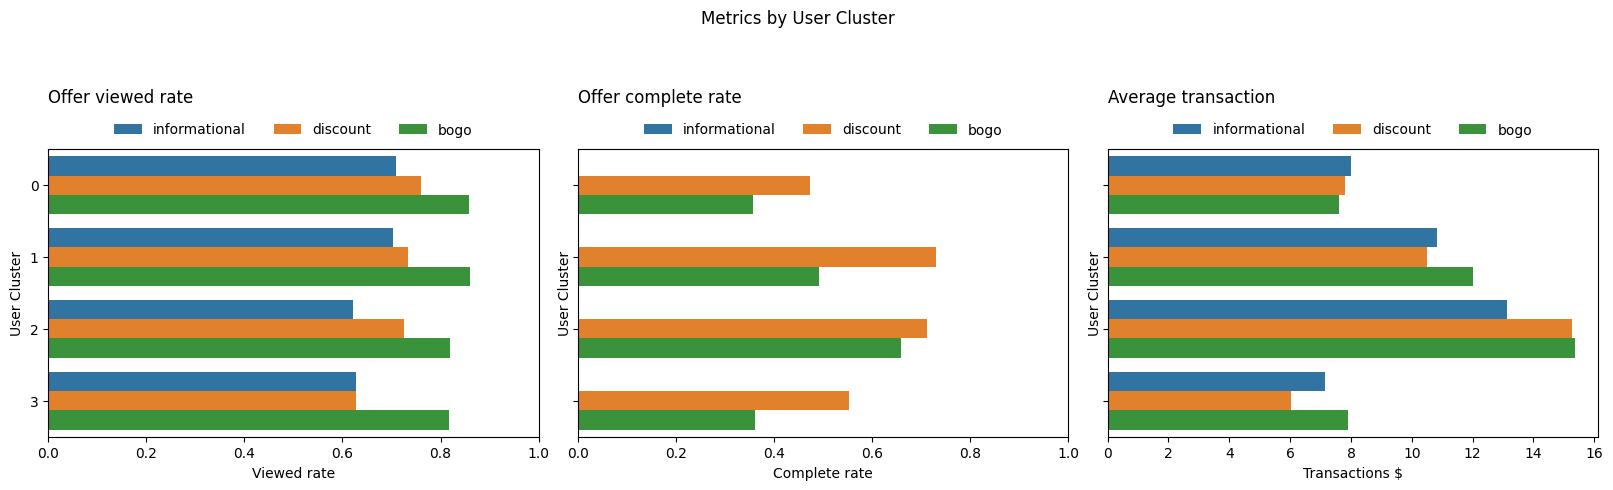

In [45]:
aux_fun.plot_grid_metrics(user_offer_df3, ['user_cluster', 'offer_type'], dodge=True)

For the main cluster (2), the average transactions in the offers type of BOGO and discount is much higher compared to the informational type.  

However, for the second highlight cluster (1), informational offers are higher average than discount

---

#### Statistics Validations 

A análise visual anterior permite ganhar uma ideia como os grupos se distribuem nas métricas.  

Vimos, por exemplo, que grupo de idade avançada tem maiores médias de transação que grupos mais novos. Porém, o que fica de pergunta é se essa diferença é estatisticamente significativa.  

Para responder esse tipo de questão, nada mais adequado do que aplicar testes de hipóteses.   

For the metrics analyzed here, the hispohess test for difference between population means is a good choice.  
As explained in: [Tests of Differences between Means](https://davidmlane.com/hyperstat/B58842.html), this test has null hypothesis as that the difference is zero and alternative hypothesis the means different. 

Using the statistical test, we can have extra security, in addition to the visualization, that the values are different between the groups.

Below are some difference analysis between groups are performed.The focus will be divided by type of offer (BOGO, DISCOUNT AND INFORMATIONAL).This may be useful for validating in which groups these offers really stand out.

*BOGO offers*

Age


---Complete Rate---------

(!=) Means of (17.999, 45.0] (0.36) and (45.0, 55.0] (0.3) are different (diff = 0.06). p-value = 0.0, confidence value = 0.05
(!=) Means of (17.999, 45.0] (0.36) and (55.0, 64.0] (0.44) are different (diff = -0.08). p-value = 0.0, confidence value = 0.05
(!=) Means of (17.999, 45.0] (0.36) and (64.0, 101.0] (0.45) are different (diff = -0.09). p-value = 0.0, confidence value = 0.05
(!=) Means of (45.0, 55.0] (0.3) and (55.0, 64.0] (0.44) are different (diff = -0.14). p-value = 0.0, confidence value = 0.05
(!=) Means of (45.0, 55.0] (0.3) and (64.0, 101.0] (0.45) are different (diff = -0.15). p-value = 0.0, confidence value = 0.05
(==) Means of (55.0, 64.0] (0.44) and (64.0, 101.0] (0.45) are equal (diff = -0.01). p-value = 0.06, confidence value = 0.05


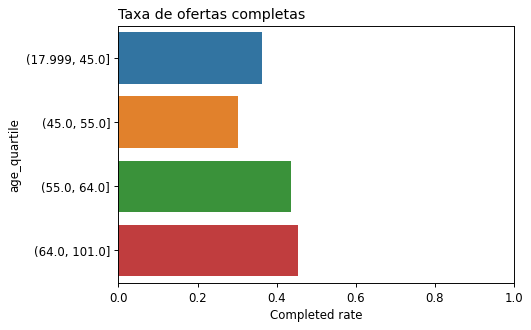


---Transactions---------

(!=) Means of (17.999, 45.0] (9.84) and (45.0, 55.0] (8.79) are different (diff = 1.05). p-value = 0.017, confidence value = 0.05
(!=) Means of (17.999, 45.0] (9.84) and (55.0, 64.0] (11.89) are different (diff = -2.05). p-value = 0.0, confidence value = 0.05
(!=) Means of (17.999, 45.0] (9.84) and (64.0, 101.0] (11.55) are different (diff = -1.71). p-value = 0.0, confidence value = 0.05
(!=) Means of (45.0, 55.0] (8.79) and (55.0, 64.0] (11.89) are different (diff = -3.1). p-value = 0.0, confidence value = 0.05
(!=) Means of (45.0, 55.0] (8.79) and (64.0, 101.0] (11.55) are different (diff = -2.76). p-value = 0.0, confidence value = 0.05
(==) Means of (55.0, 64.0] (11.89) and (64.0, 101.0] (11.55) are equal (diff = 0.34). p-value = 0.57, confidence value = 0.05


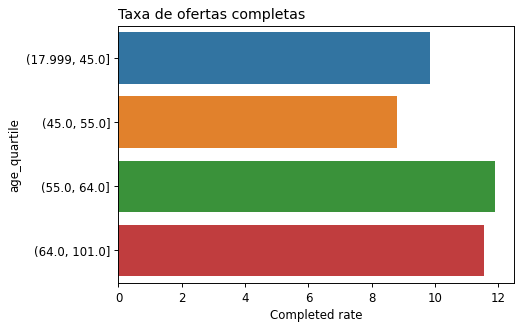

In [48]:
# First, filter the dataset with offer analyzed
bogo_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'bogo']

aux_fun.resume_differences(bogo_df, 'age_quartile')


In both metrics, the two most advanced age groups have statistically equal metrics

Income


---Complete Rate---------

(==) Means of (29999.999, 51000.0] (0.29) and (51000.0, 64000.0] (0.29) are equal (diff = 0.0). p-value = 0.878, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (0.29) and (64000.0, 76000.0] (0.45) are different (diff = -0.16). p-value = 0.0, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (0.29) and (76000.0, 120000.0] (0.54) are different (diff = -0.25). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (0.29) and (64000.0, 76000.0] (0.45) are different (diff = -0.16). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (0.29) and (76000.0, 120000.0] (0.54) are different (diff = -0.25). p-value = 0.0, confidence value = 0.05
(!=) Means of (64000.0, 76000.0] (0.45) and (76000.0, 120000.0] (0.54) are different (diff = -0.09). p-value = 0.0, confidence value = 0.05


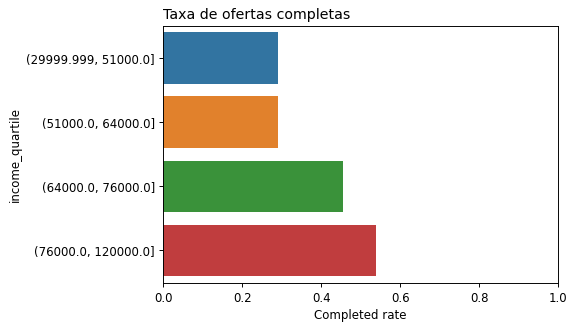


---Transactions---------

(!=) Means of (29999.999, 51000.0] (8.26) and (51000.0, 64000.0] (6.91) are different (diff = 1.35). p-value = 0.0, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (8.26) and (64000.0, 76000.0] (11.89) are different (diff = -3.63). p-value = 0.0, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (8.26) and (76000.0, 120000.0] (15.79) are different (diff = -7.53). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (6.91) and (64000.0, 76000.0] (11.89) are different (diff = -4.98). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (6.91) and (76000.0, 120000.0] (15.79) are different (diff = -8.88). p-value = 0.0, confidence value = 0.05
(!=) Means of (64000.0, 76000.0] (11.89) and (76000.0, 120000.0] (15.79) are different (diff = -3.9). p-value = 0.0, confidence value = 0.05


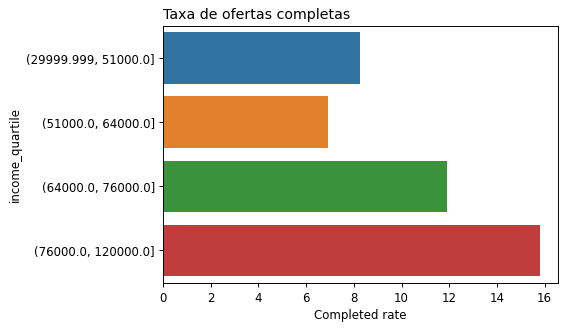

In [49]:
bogo_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'bogo']

aux_fun.resume_differences(bogo_df, 'income_quartile')

For income, the complete rate is equal to the two lower income groups.For the mean transactions, all groups differ from each other.

Time as Member


---Complete Rate---------

(!=) Means of (-0.001, 0.57] (0.24) and (0.57, 0.98] (0.32) are different (diff = -0.08). p-value = 0.0, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (0.24) and (0.98, 2.17] (0.51) are different (diff = -0.27). p-value = 0.0, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (0.24) and (2.17, 4.99] (0.45) are different (diff = -0.21). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (0.32) and (0.98, 2.17] (0.51) are different (diff = -0.19). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (0.32) and (2.17, 4.99] (0.45) are different (diff = -0.13). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.98, 2.17] (0.51) and (2.17, 4.99] (0.45) are different (diff = 0.06). p-value = 0.0, confidence value = 0.05


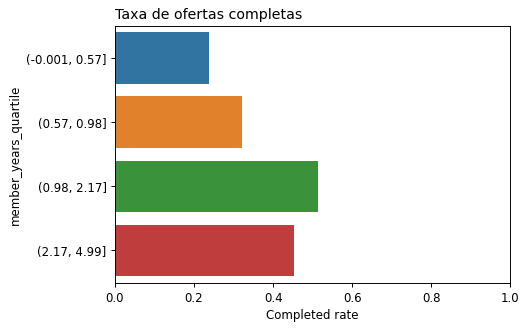


---Transactions---------

(!=) Means of (-0.001, 0.57] (5.98) and (0.57, 0.98] (8.48) are different (diff = -2.5). p-value = 0.0, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (5.98) and (0.98, 2.17] (13.51) are different (diff = -7.53). p-value = 0.0, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (5.98) and (2.17, 4.99] (13.34) are different (diff = -7.36). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (8.48) and (0.98, 2.17] (13.51) are different (diff = -5.03). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (8.48) and (2.17, 4.99] (13.34) are different (diff = -4.86). p-value = 0.0, confidence value = 0.05
(==) Means of (0.98, 2.17] (13.51) and (2.17, 4.99] (13.34) are equal (diff = 0.17). p-value = 0.766, confidence value = 0.05


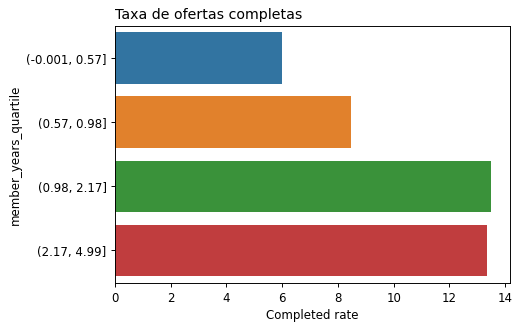

In [50]:
bogo_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'bogo']

aux_fun.resume_differences(bogo_df, 'member_years_quartile')

With the time as member, complete rate is equal to all groups.  
For average trasactions, the two older groups have equal means, differing from the rest.

Gender


---Complete Rate---------

(!=) Means of F (0.5) and M (0.36) are different (diff = 0.14). p-value = 0.0, confidence value = 0.05
(!=) Means of F (0.5) and NI (0.09) are different (diff = 0.41). p-value = 0.0, confidence value = 0.05
(==) Means of F (0.5) and O (0.55) are equal (diff = -0.05). p-value = 0.074, confidence value = 0.05
(!=) Means of M (0.36) and NI (0.09) are different (diff = 0.27). p-value = 0.0, confidence value = 0.05
(!=) Means of M (0.36) and O (0.55) are different (diff = -0.19). p-value = 0.0, confidence value = 0.05
(!=) Means of NI (0.09) and O (0.55) are different (diff = -0.46). p-value = 0.0, confidence value = 0.05


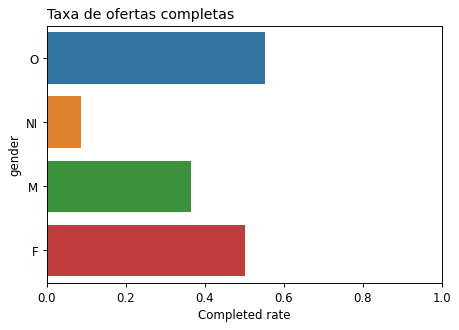


---Transactions---------

(!=) Means of F (12.85) and M (10.21) are different (diff = 2.64). p-value = 0.0, confidence value = 0.05
(!=) Means of F (12.85) and NI (3.55) are different (diff = 9.3). p-value = 0.0, confidence value = 0.05
(==) Means of F (12.85) and O (10.82) are equal (diff = 2.03). p-value = 0.297, confidence value = 0.05
(!=) Means of M (10.21) and NI (3.55) are different (diff = 6.66). p-value = 0.0, confidence value = 0.05
(==) Means of M (10.21) and O (10.82) are equal (diff = -0.61). p-value = 0.692, confidence value = 0.05
(!=) Means of NI (3.55) and O (10.82) are different (diff = -7.27). p-value = 0.0, confidence value = 0.05


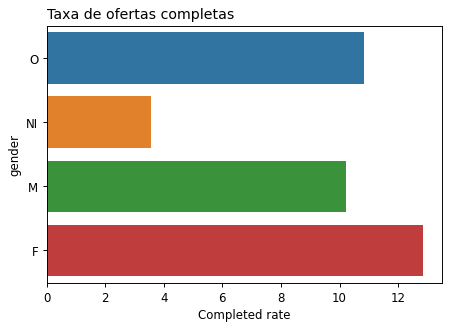

In [51]:
bogo_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'bogo']

aux_fun.resume_differences(bogo_df, 'gender')

Women and others have complete rate equals.  

For the average transactions, men and others equal. As well as women and others. However, women and men have statistically significant differences.

User Cluster


---Complete Rate---------

(!=) Means of 0 (0.31) and 1 (0.42) are different (diff = -0.11). p-value = 0.0, confidence value = 0.05
(!=) Means of 0 (0.31) and 2 (0.54) are different (diff = -0.23). p-value = 0.0, confidence value = 0.05
(==) Means of 0 (0.31) and 3 (0.3) are equal (diff = 0.01). p-value = 0.137, confidence value = 0.05
(!=) Means of 1 (0.42) and 2 (0.54) are different (diff = -0.12). p-value = 0.0, confidence value = 0.05
(!=) Means of 1 (0.42) and 3 (0.3) are different (diff = 0.12). p-value = 0.0, confidence value = 0.05
(!=) Means of 2 (0.54) and 3 (0.3) are different (diff = 0.24). p-value = 0.0, confidence value = 0.05


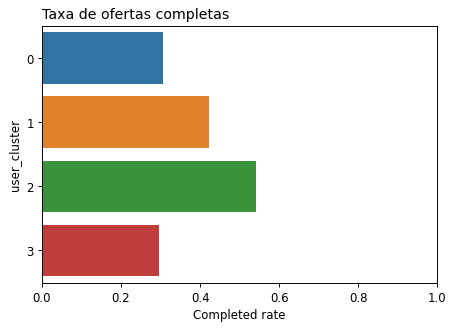


---Transactions---------

(!=) Means of 0 (7.61) and 1 (12.03) are different (diff = -4.42). p-value = 0.0, confidence value = 0.05
(!=) Means of 0 (7.61) and 2 (15.36) are different (diff = -7.75). p-value = 0.0, confidence value = 0.05
(==) Means of 0 (7.61) and 3 (7.9) are equal (diff = -0.29). p-value = 0.438, confidence value = 0.05
(!=) Means of 1 (12.03) and 2 (15.36) are different (diff = -3.33). p-value = 0.0, confidence value = 0.05
(!=) Means of 1 (12.03) and 3 (7.9) are different (diff = 4.13). p-value = 0.0, confidence value = 0.05
(!=) Means of 2 (15.36) and 3 (7.9) are different (diff = 7.46). p-value = 0.0, confidence value = 0.05


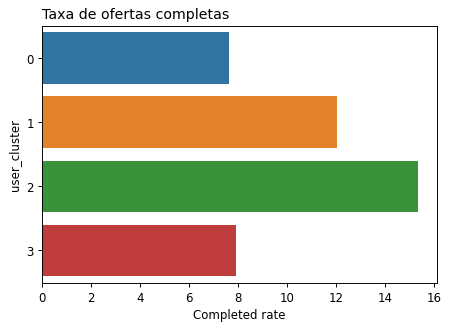

In [52]:
bogo_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'bogo']

aux_fun.resume_differences(bogo_df, 'user_cluster')

In both metrics Users of cluster 1 and 2 equals

Discount offers

In [63]:
discount_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'discount']

Age


---Complete Rate---------

(!=) Means of (17.999, 45.0] (0.42) and (45.0, 55.0] (0.36) are different (diff = 0.06). p-value = 0.0, confidence value = 0.05
(!=) Means of (17.999, 45.0] (0.42) and (55.0, 64.0] (0.48) are different (diff = -0.06). p-value = 0.0, confidence value = 0.05
(!=) Means of (17.999, 45.0] (0.42) and (64.0, 101.0] (0.48) are different (diff = -0.06). p-value = 0.0, confidence value = 0.05
(!=) Means of (45.0, 55.0] (0.36) and (55.0, 64.0] (0.48) are different (diff = -0.12). p-value = 0.0, confidence value = 0.05
(!=) Means of (45.0, 55.0] (0.36) and (64.0, 101.0] (0.48) are different (diff = -0.12). p-value = 0.0, confidence value = 0.05
(==) Means of (55.0, 64.0] (0.48) and (64.0, 101.0] (0.48) are equal (diff = 0.0). p-value = 0.43, confidence value = 0.05


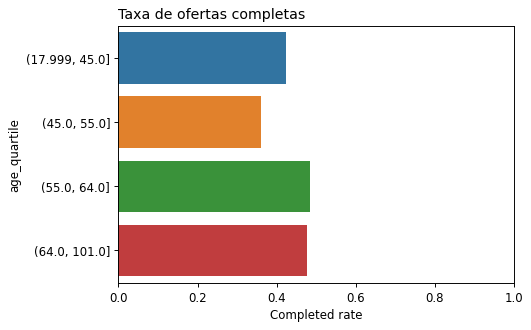


---Transactions---------

(==) Means of (17.999, 45.0] (7.77) and (45.0, 55.0] (8.04) are equal (diff = -0.27). p-value = 0.415, confidence value = 0.05
(!=) Means of (17.999, 45.0] (7.77) and (55.0, 64.0] (11.28) are different (diff = -3.51). p-value = 0.0, confidence value = 0.05
(!=) Means of (17.999, 45.0] (7.77) and (64.0, 101.0] (12.38) are different (diff = -4.61). p-value = 0.0, confidence value = 0.05
(!=) Means of (45.0, 55.0] (8.04) and (55.0, 64.0] (11.28) are different (diff = -3.24). p-value = 0.0, confidence value = 0.05
(!=) Means of (45.0, 55.0] (8.04) and (64.0, 101.0] (12.38) are different (diff = -4.34). p-value = 0.0, confidence value = 0.05
(==) Means of (55.0, 64.0] (11.28) and (64.0, 101.0] (12.38) are equal (diff = -1.1). p-value = 0.1, confidence value = 0.05


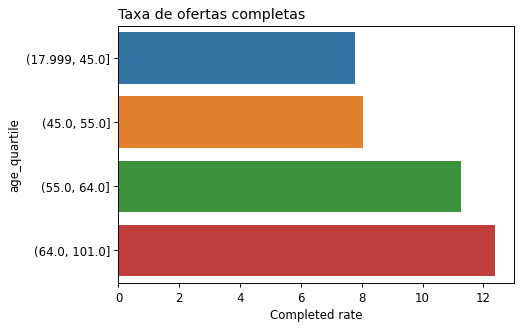

In [53]:
aux_fun.resume_differences(discount_df, 'age_quartile')

Again, the older age groups equals the metrics for discount-like offers.

Unlike BOGO offers, the newer ages group is not different in transactions.Statistically has the same transaction averages

Income


---Complete Rate---------

(==) Means of (29999.999, 51000.0] (0.37) and (51000.0, 64000.0] (0.37) are equal (diff = 0.0). p-value = 0.325, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (0.37) and (64000.0, 76000.0] (0.49) are different (diff = -0.12). p-value = 0.0, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (0.37) and (76000.0, 120000.0] (0.53) are different (diff = -0.16). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (0.37) and (64000.0, 76000.0] (0.49) are different (diff = -0.12). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (0.37) and (76000.0, 120000.0] (0.53) are different (diff = -0.16). p-value = 0.0, confidence value = 0.05
(!=) Means of (64000.0, 76000.0] (0.49) and (76000.0, 120000.0] (0.53) are different (diff = -0.04). p-value = 0.0, confidence value = 0.05


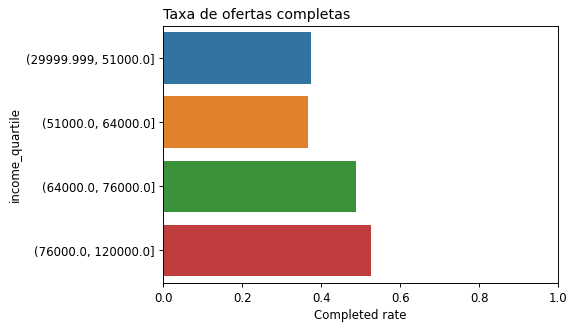


---Transactions---------

(!=) Means of (29999.999, 51000.0] (6.43) and (51000.0, 64000.0] (7.21) are different (diff = -0.78). p-value = 0.007, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (6.43) and (64000.0, 76000.0] (10.67) are different (diff = -4.24). p-value = 0.0, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (6.43) and (76000.0, 120000.0] (15.41) are different (diff = -8.98). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (7.21) and (64000.0, 76000.0] (10.67) are different (diff = -3.46). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (7.21) and (76000.0, 120000.0] (15.41) are different (diff = -8.2). p-value = 0.0, confidence value = 0.05
(!=) Means of (64000.0, 76000.0] (10.67) and (76000.0, 120000.0] (15.41) are different (diff = -4.74). p-value = 0.0, confidence value = 0.05


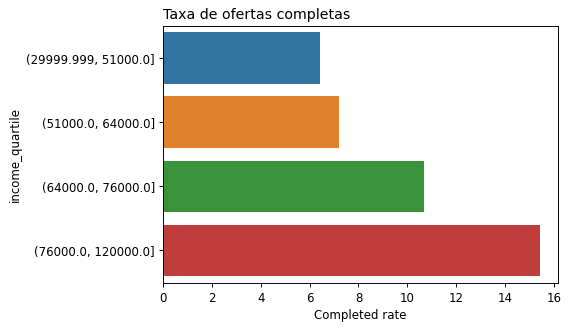

In [54]:
aux_fun.resume_differences(discount_df, 'income_quartile')

For income, the behavior between groups repeats as in BOGO offers

Time as Member


---Complete Rate---------

(!=) Means of (-0.001, 0.57] (0.29) and (0.57, 0.98] (0.36) are different (diff = -0.07). p-value = 0.0, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (0.29) and (0.98, 2.17] (0.53) are different (diff = -0.24). p-value = 0.0, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (0.29) and (2.17, 4.99] (0.54) are different (diff = -0.25). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (0.36) and (0.98, 2.17] (0.53) are different (diff = -0.17). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (0.36) and (2.17, 4.99] (0.54) are different (diff = -0.18). p-value = 0.0, confidence value = 0.05
(==) Means of (0.98, 2.17] (0.53) and (2.17, 4.99] (0.54) are equal (diff = -0.01). p-value = 0.095, confidence value = 0.05


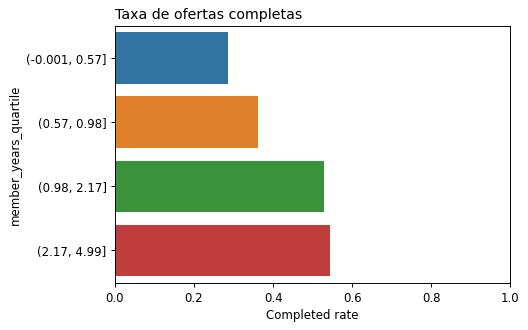


---Transactions---------

(!=) Means of (-0.001, 0.57] (6.64) and (0.57, 0.98] (8.01) are different (diff = -1.37). p-value = 0.002, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (6.64) and (0.98, 2.17] (12.44) are different (diff = -5.8). p-value = 0.0, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (6.64) and (2.17, 4.99] (11.62) are different (diff = -4.98). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (8.01) and (0.98, 2.17] (12.44) are different (diff = -4.43). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (8.01) and (2.17, 4.99] (11.62) are different (diff = -3.61). p-value = 0.0, confidence value = 0.05
(==) Means of (0.98, 2.17] (12.44) and (2.17, 4.99] (11.62) are equal (diff = 0.82). p-value = 0.116, confidence value = 0.05


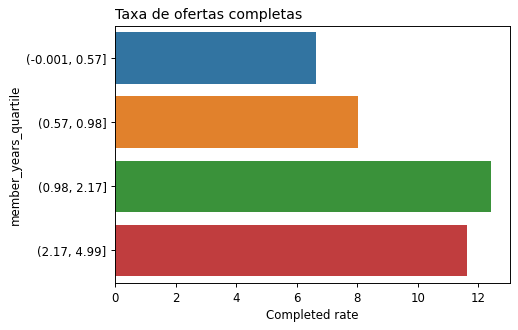

In [55]:
aux_fun.resume_differences(discount_df, 'member_years_quartile')

For time as member, there is a difference for discount offers on complete rate.  
  Older users as members have equal rates while for BOGO offers were different rates.

Gender


---Complete Rate---------

(!=) Means of F (0.5) and M (0.44) are different (diff = 0.06). p-value = 0.0, confidence value = 0.05
(!=) Means of F (0.5) and NI (0.19) are different (diff = 0.31). p-value = 0.0, confidence value = 0.05
(!=) Means of F (0.5) and O (0.57) are different (diff = -0.07). p-value = 0.015, confidence value = 0.05
(!=) Means of M (0.44) and NI (0.19) are different (diff = 0.25). p-value = 0.0, confidence value = 0.05
(!=) Means of M (0.44) and O (0.57) are different (diff = -0.13). p-value = 0.0, confidence value = 0.05
(!=) Means of NI (0.19) and O (0.57) are different (diff = -0.38). p-value = 0.0, confidence value = 0.05


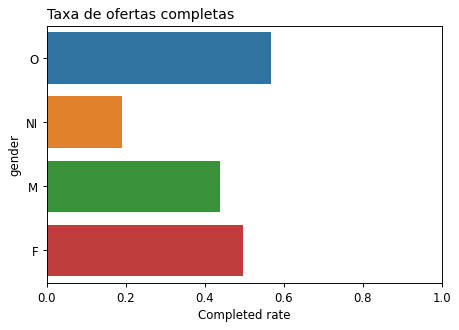


---Transactions---------

(!=) Means of F (12.1) and M (9.22) are different (diff = 2.88). p-value = 0.0, confidence value = 0.05
(!=) Means of F (12.1) and NI (3.99) are different (diff = 8.11). p-value = 0.0, confidence value = 0.05
(==) Means of F (12.1) and O (13.77) are equal (diff = -1.67). p-value = 0.38, confidence value = 0.05
(!=) Means of M (9.22) and NI (3.99) are different (diff = 5.23). p-value = 0.0, confidence value = 0.05
(!=) Means of M (9.22) and O (13.77) are different (diff = -4.55). p-value = 0.003, confidence value = 0.05
(!=) Means of NI (3.99) and O (13.77) are different (diff = -9.78). p-value = 0.0, confidence value = 0.05


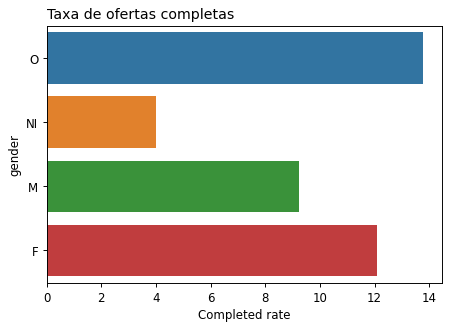

In [57]:
aux_fun.resume_differences(discount_df, 'gender')

In the case of men, statistics for discount offers are equality between men and others.

User Cluster


---Complete Rate---------

(!=) Means of 0 (0.36) and 1 (0.54) are different (diff = -0.18). p-value = 0.0, confidence value = 0.05
(!=) Means of 0 (0.36) and 2 (0.52) are different (diff = -0.16). p-value = 0.0, confidence value = 0.05
(==) Means of 0 (0.36) and 3 (0.35) are equal (diff = 0.01). p-value = 0.11, confidence value = 0.05
(!=) Means of 1 (0.54) and 2 (0.52) are different (diff = 0.02). p-value = 0.04, confidence value = 0.05
(!=) Means of 1 (0.54) and 3 (0.35) are different (diff = 0.19). p-value = 0.0, confidence value = 0.05
(!=) Means of 2 (0.52) and 3 (0.35) are different (diff = 0.17). p-value = 0.0, confidence value = 0.05


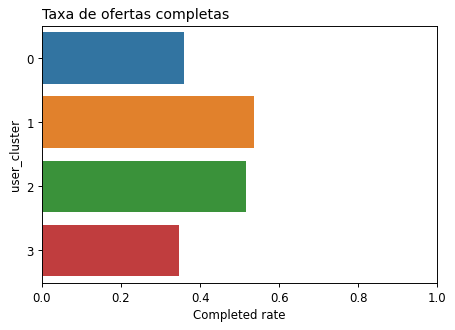


---Transactions---------

(!=) Means of 0 (7.81) and 1 (10.49) are different (diff = -2.68). p-value = 0.0, confidence value = 0.05
(!=) Means of 0 (7.81) and 2 (15.26) are different (diff = -7.45). p-value = 0.0, confidence value = 0.05
(!=) Means of 0 (7.81) and 3 (6.02) are different (diff = 1.79). p-value = 0.0, confidence value = 0.05
(!=) Means of 1 (10.49) and 2 (15.26) are different (diff = -4.77). p-value = 0.0, confidence value = 0.05
(!=) Means of 1 (10.49) and 3 (6.02) are different (diff = 4.47). p-value = 0.0, confidence value = 0.05
(!=) Means of 2 (15.26) and 3 (6.02) are different (diff = 9.24). p-value = 0.0, confidence value = 0.05


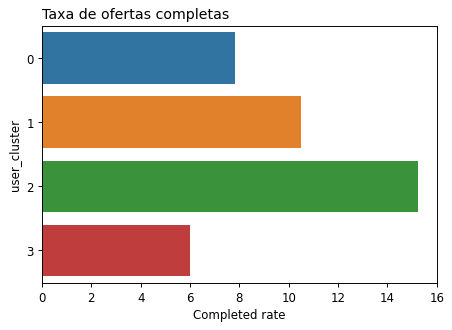

In [58]:
aux_fun.resume_differences(discount_df, 'user_cluster')

The difference in the case of user cluster it is that customers of cluster 0 and 3 equals the average of transactions, while this did not happen for BOGO offers.

Informational

In [62]:
informa_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'informational']

Age


---Transactions---------

(!=) Means of (17.999, 45.0] (9.88) and (45.0, 55.0] (7.49) are different (diff = 2.39). p-value = 0.0, confidence value = 0.05
(==) Means of (17.999, 45.0] (9.88) and (55.0, 64.0] (10.7) are equal (diff = -0.82). p-value = 0.301, confidence value = 0.05
(==) Means of (17.999, 45.0] (9.88) and (64.0, 101.0] (10.95) are equal (diff = -1.07). p-value = 0.128, confidence value = 0.05
(!=) Means of (45.0, 55.0] (7.49) and (55.0, 64.0] (10.7) are different (diff = -3.21). p-value = 0.0, confidence value = 0.05
(!=) Means of (45.0, 55.0] (7.49) and (64.0, 101.0] (10.95) are different (diff = -3.46). p-value = 0.0, confidence value = 0.05
(==) Means of (55.0, 64.0] (10.7) and (64.0, 101.0] (10.95) are equal (diff = -0.25). p-value = 0.736, confidence value = 0.05


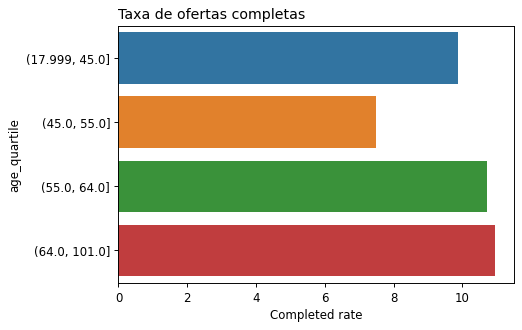

In [59]:
aux_fun.resume_differences(informa_df, 'age_quartile')

For the transaction averages of the offers is the equality of the newest age groups (18 to 45) with more advanced ages, leaving the group of 45 to 55 years isolated with the lower average.

Income


---Transactions---------

(==) Means of (29999.999, 51000.0] (6.47) and (51000.0, 64000.0] (7.27) are equal (diff = -0.8). p-value = 0.098, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (6.47) and (64000.0, 76000.0] (12.99) are different (diff = -6.52). p-value = 0.0, confidence value = 0.05
(!=) Means of (29999.999, 51000.0] (6.47) and (76000.0, 120000.0] (13.35) are different (diff = -6.88). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (7.27) and (64000.0, 76000.0] (12.99) are different (diff = -5.72). p-value = 0.0, confidence value = 0.05
(!=) Means of (51000.0, 64000.0] (7.27) and (76000.0, 120000.0] (13.35) are different (diff = -6.08). p-value = 0.0, confidence value = 0.05
(==) Means of (64000.0, 76000.0] (12.99) and (76000.0, 120000.0] (13.35) are equal (diff = -0.36). p-value = 0.69, confidence value = 0.05


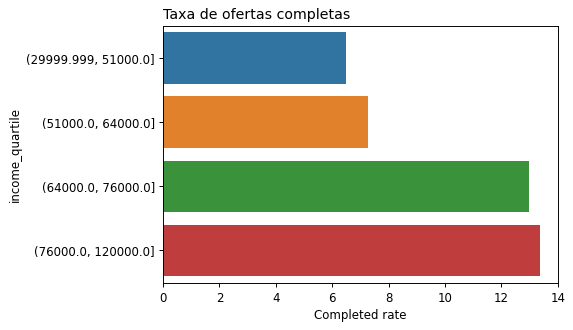

In [61]:
aux_fun.resume_differences(informa_df, 'income_quartile')

For income, the two groups of minors and higher income equals

Time as member


---Transactions---------

(!=) Means of (-0.001, 0.57] (4.71) and (0.57, 0.98] (7.63) are different (diff = -2.92). p-value = 0.0, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (4.71) and (0.98, 2.17] (14.08) are different (diff = -9.37). p-value = 0.0, confidence value = 0.05
(!=) Means of (-0.001, 0.57] (4.71) and (2.17, 4.99] (11.84) are different (diff = -7.13). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (7.63) and (0.98, 2.17] (14.08) are different (diff = -6.45). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.57, 0.98] (7.63) and (2.17, 4.99] (11.84) are different (diff = -4.21). p-value = 0.0, confidence value = 0.05
(!=) Means of (0.98, 2.17] (14.08) and (2.17, 4.99] (11.84) are different (diff = 2.24). p-value = 0.003, confidence value = 0.05


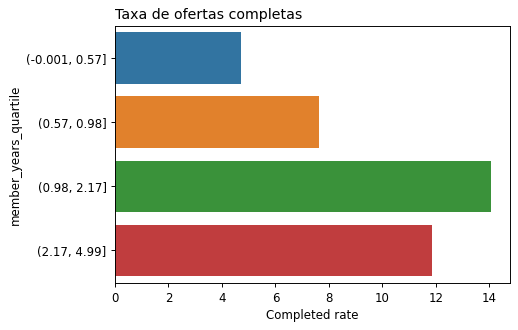

In [67]:
aux_fun.resume_differences(informa_df, 'member_years_quartile')

For time as a member, all groups differ in the mean transaction.Thus, the group of 1 to 2 years as a member has higher average compared to other groups

Gender


---Transactions---------

(!=) Means of F (12.41) and M (9.27) are different (diff = 3.14). p-value = 0.0, confidence value = 0.05
(!=) Means of F (12.41) and NI (1.93) are different (diff = 10.48). p-value = 0.0, confidence value = 0.05
(==) Means of F (12.41) and O (15.26) are equal (diff = -2.85). p-value = 0.239, confidence value = 0.05
(!=) Means of M (9.27) and NI (1.93) are different (diff = 7.34). p-value = 0.0, confidence value = 0.05
(!=) Means of M (9.27) and O (15.26) are different (diff = -5.99). p-value = 0.004, confidence value = 0.05
(!=) Means of NI (1.93) and O (15.26) are different (diff = -13.33). p-value = 0.0, confidence value = 0.05


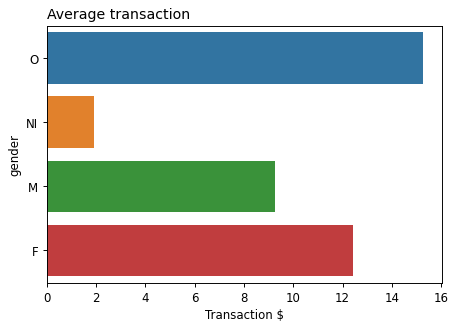

In [70]:
aux_fun.resume_differences(informa_df, 'gender')

For gender, only women and others have the same average transaction.

#### Summarize the best groups

All statistical validations performed above can otherwise be used.  

Below I use the same validations to determine which best group of users for each type of offer.Then I do the same for user groups, determining which offerings would be better for each one.  

The decision criteria will be the highest average of the metric evaluated. With statistical validation, the largest equal medium groups can be grouped and determined as best for that offer.  

A minimum gain column is added to inform how much the highest average group differs from the second group. Thus, there is a notion of the gain by delivering the offer to that group compared to another.  

For BOGO offers

In [71]:
bogo_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'bogo']

columns = ['age_quartile', 'income_quartile', 'gender', 
    'member_years_quartile',  'user_cluster']

In [77]:
dfs = []

for column in columns:
    dfs.append(aux_fun.best_groups_means(bogo_df, column, 'completed_after_view_rate'))

pd.concat(dfs)

,best_groups,best_value,min_gain
age_quartile,"[(64.0, 101.0], (55.0, 64.0]]",0.45,0.09
income_quartile,"[(76000.0, 120000.0]]",0.54,0.09
gender,"[O, F]",0.55,0.19
member_years_quartile,"[(0.98, 2.17]]",0.51,0.06
user_cluster,[2],0.54,0.12


In [78]:
dfs = []

for column in columns:
    dfs.append(aux_fun.best_groups_means(bogo_df, column, 'tra_offer_infl'))

pd.concat(dfs)

,best_groups,best_value,min_gain
age_quartile,"[(55.0, 64.0], (64.0, 101.0]]",11.89,2.05
income_quartile,"[(76000.0, 120000.0]]",15.79,3.90
gender,"[F, O]",12.85,2.64
member_years_quartile,"[(0.98, 2.17], (2.17, 4.99]]",13.51,5.03
user_cluster,[2],15.36,3.33


The difference between the two metrics is in time as a member.For mean transaction, the older group of members enter the options.

For discount offers

In [74]:
discount_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'discount']

columns = ['age_quartile', 'income_quartile', 'gender', 
    'member_years_quartile',  'user_cluster']

In [79]:
dfs = []

for column in columns:
    dfs.append(aux_fun.best_groups_means(discount_df, column, 'completed_after_view_rate'))

pd.concat(dfs)

,best_groups,best_value,min_gain
age_quartile,"[(55.0, 64.0], (64.0, 101.0]]",0.48,0.06
income_quartile,"[(76000.0, 120000.0]]",0.53,0.04
gender,[O],0.57,0.07
member_years_quartile,"[(2.17, 4.99], (0.98, 2.17]]",0.54,0.18
user_cluster,[1],0.54,0.02


In [80]:
dfs = []

for column in columns:
    dfs.append(aux_fun.best_groups_means(discount_df, column, 'tra_offer_infl'))

pd.concat(dfs)

,best_groups,best_value,min_gain
age_quartile,"[(64.0, 101.0], (55.0, 64.0]]",12.38,4.34
income_quartile,"[(76000.0, 120000.0]]",15.41,4.74
gender,"[O, F]",13.77,4.55
member_years_quartile,"[(0.98, 2.17], (2.17, 4.99]]",12.44,4.43
user_cluster,[2],15.26,4.77


For discount, aiming transactions, the best user cluster is 2, already aiming complete rate, the best would be the cluster 1.

For informational offers

In [83]:
informational_df = user_offer_df3.loc[user_offer_df3['offer_type'] == 'informational']

columns = ['age_quartile', 'income_quartile', 'gender', 
    'member_years_quartile',  'user_cluster']

In [82]:
dfs = []

for column in columns:
    dfs.append(aux_fun.best_groups_means(informational_df, column, 'tra_offer_infl'))

pd.concat(dfs)

,best_groups,best_value,min_gain
age_quartile,"[(64.0, 101.0], (55.0, 64.0], (17.999, 45.0]]",10.95,3.46
income_quartile,"[(76000.0, 120000.0], (64000.0, 76000.0]]",13.35,6.08
gender,"[O, F]",15.26,5.99
member_years_quartile,"[(0.98, 2.17]]",14.08,2.24
user_cluster,[2],13.14,2.31


For informational, almost all user groups are recommended

For groups perpectives

Age

In [85]:
aux_fun.resume_best_for_groups(user_offer_df3, 'age_quartile', 'tra_offer_infl')

,best_groups,best_value,min_gain
category,,,
"(17.999, 45.0]","[informational, bogo]",9.88,2.11
"(45.0, 55.0]","[bogo, discount]",8.79,1.30
"(55.0, 64.0]","[bogo, discount, informational]",11.89,0.00
"(64.0, 101.0]","[discount, bogo, informational]",12.38,0.00


For ages above 55 years, any offer fits well

Income

In [86]:
aux_fun.resume_best_for_groups(user_offer_df3, 'income_quartile', 'tra_offer_infl')

,best_groups,best_value,min_gain
category,,,
"(29999.999, 51000.0]",[bogo],8.26,1.79
"(51000.0, 64000.0]","[informational, discount, bogo]",7.27,0.00
"(64000.0, 76000.0]","[informational, bogo]",12.99,2.32
"(76000.0, 120000.0]","[bogo, discount]",15.79,2.44


For lower income, BOGO offers have higher transaction rates.  
For more fortunate groups, the informational offers do not have good numbers.

Time as Member

In [87]:
aux_fun.resume_best_for_groups(user_offer_df3, 'member_years_quartile', 'tra_offer_infl')

,best_groups,best_value,min_gain
category,,,
"(-0.001, 0.57]","[discount, bogo]",6.64,1.93
"(0.57, 0.98]","[bogo, discount, informational]",8.48,0.00
"(0.98, 2.17]","[informational, bogo]",14.08,1.64
"(2.17, 4.99]",[bogo],13.34,1.50


For older user, BOGO's offer stands out with better option. For users between 1 and 2 years, informational is a valid offer. For a newer user, discount and BOGO offers are good options.

Gender

In [53]:
aux_fun.resume_best_for_groups(user_offer_df3, 'gender', 'tra_offer_infl')

,best_groups,best_value,min_gain
category,,,
F,"[bogo, informational, discount]",12.85,0.00
M,[bogo],10.21,0.94
NI,[discount],3.99,0.44
O,"[informational, discount, bogo]",15.26,0.00


For women, all offers are equivalent.  
For men, BOGO offers are worthy.

#### Conclusion

A última seção deixou claro algumas consideações a serem feitas sobre os dados